In [7]:
import pandas as pd
import numpy as np
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import RandomizedSearchCV
from typing import Union, List
import joblib
import imblearn
import warnings
from collections import Counter
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

warnings.filterwarnings(action='ignore')

## load data

In [2]:
df = pd.read_csv('modified_0420.csv')

In [3]:
print(df.shape)
df = df.drop(columns=['Unnamed: 0'])
df

(1131682, 91)


,loan_amnt,term,int_rate,installment,sub_grade,emp_length,loan_status,delinq_2yrs,inq_last_6mths,pub_rec,...,tax_liens_log,tot_cur_bal_log,tot_hi_cred_lim_log,total_acc_log,total_bal_ex_mort_log,total_bal_il_log,total_bc_limit_log,total_cu_tl_log,total_il_high_credit_limit_log,total_rev_hi_lim_log
0,6000.0,36,7.97,187.94,4,2,0,1.0,0.0,0.0,...,0.0,10.820878,11.272280,3.610918,10.820878,10.757158,9.615872,0.000000,10.942208,10.003378
1,23200.0,60,24.99,680.82,23,10,1,1.0,1.0,0.0,...,0.0,13.315176,13.386134,4.110874,12.592905,12.533767,9.918425,1.386294,12.582679,10.317450
2,16000.0,36,7.07,494.55,1,10,1,0.0,0.0,0.0,...,0.0,11.522113,12.186584,3.367296,10.390594,10.263641,10.987003,0.000000,10.806490,11.157692
3,4500.0,36,10.42,146.10,7,5,0,0.0,0.0,2.0,...,0.0,12.178635,12.263577,2.302585,9.166806,7.919356,9.137877,0.000000,9.390242,9.532496
4,20000.0,36,9.99,645.25,7,10,0,0.0,0.0,0.0,...,0.0,11.831590,12.137612,3.713572,11.101704,0.000000,9.305741,0.000000,11.199461,10.229224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131677,26500.0,60,17.27,662.45,14,2,0,0.0,0.0,0.0,...,0.0,12.346938,12.461776,2.833213,10.434557,0.000000,9.846970,0.000000,9.728241,10.507831
1131678,3600.0,36,19.99,133.78,20,7,1,0.0,0.0,0.0,...,0.0,11.195760,11.378571,2.302585,9.390493,0.000000,8.779711,0.000000,9.501217,9.278092
1131679,19000.0,36,6.68,583.89,2,4,0,0.0,0.0,0.0,...,0.0,12.388636,12.548072,3.526361,10.837304,0.000000,9.775711,0.000000,10.681688,10.225607
1131680,9600.0,36,14.33,329.65,10,9,0,0.0,1.0,0.0,...,0.0,11.884551,11.926941,2.197225,9.513256,0.000000,8.343078,0.000000,9.251002,8.881975


In [8]:
scaler = RobustScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df), index = df.index, columns = df.columns)

In [9]:
scaled_df

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,loan_status,delinq_2yrs,inq_last_6mths,pub_rec,...,tax_liens_log,tot_cur_bal_log,tot_hi_cred_lim_log,total_acc_log,total_bal_ex_mort_log,total_bal_il_log,total_bc_limit_log,total_cu_tl_log,total_il_high_credit_limit_log,total_rev_hi_lim_log
0,-0.500000,0.0,-0.744479,-0.550282,-0.750,-0.714286,0.0,1.0,0.0,0.0,...,0.0,-0.182635,-0.178150,0.684346,0.267672,1.054882,-0.014680,0.0,0.402719,-0.072944
1,0.933333,1.0,1.940063,0.904854,1.625,0.428571,1.0,1.0,1.0,0.0,...,0.0,1.025950,1.073751,1.474762,1.794295,1.229102,0.209626,2.0,1.504129,0.204842
2,0.333333,0.0,-0.886435,0.354927,-1.125,0.428571,1.0,0.0,0.0,0.0,...,0.0,0.157141,0.363334,0.299186,-0.103023,1.006486,1.001846,0.0,0.311598,0.948009
3,-0.625000,0.0,-0.358044,-0.673806,-0.375,-0.285714,0.0,0.0,0.0,2.0,...,0.0,0.475251,0.408932,-1.384091,-1.157331,0.776598,-0.369055,0.0,-0.639269,-0.489424
4,0.666667,0.0,-0.425868,0.799841,-0.375,0.428571,0.0,0.0,0.0,0.0,...,0.0,0.307094,0.334331,0.846639,0.509607,0.000000,-0.244604,0.0,0.575438,0.126809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131677,1.208333,1.0,0.722397,0.850620,0.500,-0.714286,0.0,0.0,0.0,0.0,...,0.0,0.556801,0.526313,-0.545183,-0.065148,0.000000,0.156651,0.0,-0.412337,0.373228
1131678,-0.700000,0.0,1.151420,-0.710179,1.250,0.000000,1.0,0.0,0.0,0.0,...,0.0,-0.000990,-0.115201,-1.384091,-0.964622,0.000000,-0.634591,0.0,-0.564761,-0.714436
1131679,0.583333,0.0,-0.947950,0.618687,-1.000,-0.428571,0.0,0.0,0.0,0.0,...,0.0,0.577005,0.577421,0.550663,0.281823,0.000000,0.103821,0.0,0.227806,0.123610
1131680,-0.200000,0.0,0.258675,-0.131909,0.000,0.285714,0.0,0.0,1.0,0.0,...,0.0,0.332756,0.209564,-1.550663,-0.858860,0.000000,-0.958302,0.0,-0.732755,-1.064789


## Design Matrix

In [10]:
df_X = scaled_df.drop(columns=['loan_status'])
df_y = scaled_df['loan_status']

pca = PCA(n_components = 0.9)
pca.fit(df_X)
df_X = pca.transform(df_X)

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.2, random_state = 30)

#smote oversample
smote = SMOTE(random_state = 30)

X_train, y_train = smote.fit_resample(X_train, y_train)

## Fitting

In [29]:
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import LogisticRegressionCV

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.svm import SVC

### Model 1

In [19]:
clfRidge = RidgeClassifierCV().fit(X_train, y_train)

              precision    recall  f1-score   support

         0.0       0.88      0.66      0.75    180654
         1.0       0.32      0.63      0.42     45683

    accuracy                           0.65    226337
   macro avg       0.60      0.65      0.59    226337
weighted avg       0.76      0.65      0.69    226337



Text(0.5, 1.0, 'clfRidge')

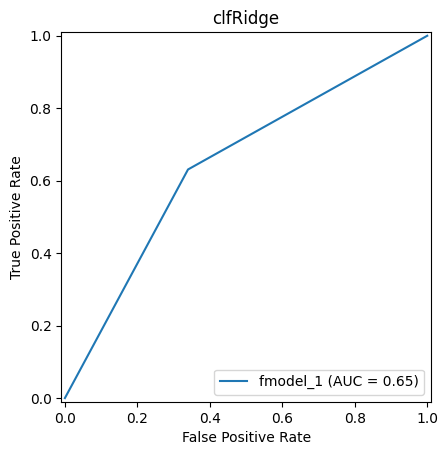

In [20]:
y_pred = clfRidge.predict(X_test)
joblib.dump(clfRidge, 'fmodel_1.pkl')
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name='fmodel_1')
display.plot()
plt.title('clfRidge')

### Model 2

In [14]:
clfLasso = LogisticRegressionCV(penalty='l1', solver = 'saga', random_state = 30).fit(X_train, y_train)

              precision    recall  f1-score   support

         0.0       0.88      0.66      0.75    180654
         1.0       0.32      0.63      0.42     45683

    accuracy                           0.65    226337
   macro avg       0.60      0.65      0.59    226337
weighted avg       0.76      0.65      0.69    226337



Text(0.5, 1.0, 'clfLasso')

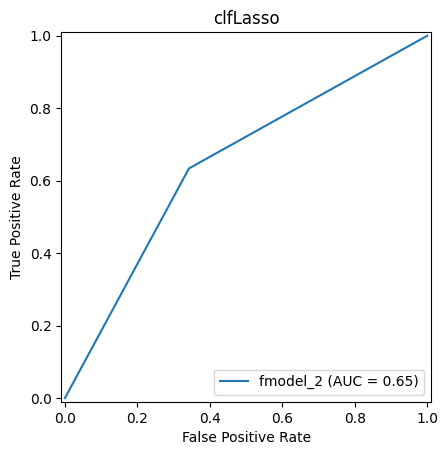

In [21]:
y_pred = clfLasso.predict(X_test)
joblib.dump(clfLasso, 'fmodel_2.pkl')
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name='fmodel_2')
display.plot()
plt.title('clfLasso')

### Model 3

In [24]:
clfRF = RandomForestClassifier(max_depth = 120, random_state = 30)
clfRF.fit(X_train, y_train)

RandomForestClassifier(max_depth=120, random_state=30)

              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83    180654
         1.0       0.36      0.40      0.37     45683

    accuracy                           0.73    226337
   macro avg       0.60      0.61      0.60    226337
weighted avg       0.74      0.73      0.74    226337



Text(0.5, 1.0, 'clfRF')

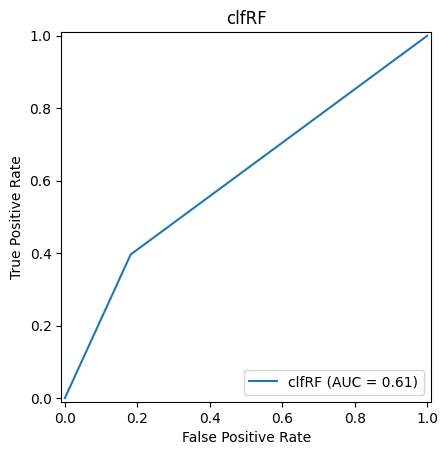

In [25]:
y_pred = clfRF.predict(X_test)
joblib.dump(clfRF, 'fmodel_3.pkl')
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name='clfRF')
display.plot()
plt.title('clfRF')

### Model 4

In [26]:
clfXGB = XGBClassifier(random_state = 30, max_depth = 120)
clfXGB.fit(X_train, y_train)
clfXGB

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=120, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=30, ...)

In [27]:
y_pred = clfXGB.predict(X_test)
joblib.dump(clfXGB, 'fmodel_4.pkl')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83    180654
         1.0       0.35      0.35      0.35     45683

    accuracy                           0.74    226337
   macro avg       0.59      0.59      0.59    226337
weighted avg       0.74      0.74      0.74    226337



Text(0.5, 1.0, 'clfXGB')

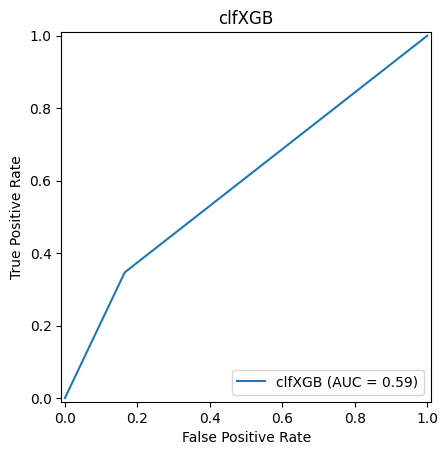

In [28]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name='clfXGB')
display.plot()
plt.title('clfXGB')

### Model 5

In [30]:
clfSVM = SVC(random_state = 30, kernel = 'sigmoid')
clfSVM.fit(X_train, y_train)
clfSVM